# <p style="background-color:#F19F9F;font-family:newtimeroman;color:#494545;font-size:130%;text-align:center;border-radius:15px 15px;">Walmart Store Marketdata Analysis</p>
![](https://blog.logomyway.com/wp-content/uploads/2017/02/history-of-walmart-and-logo.jpg)

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
       
* [3. DATA EXPLORATORY & CLEANING](#3)
* [4. REDUCING MEMORY](#4)
* [5. FEATURE ENGINEERING](#5)
* [6. DATA VISUALIZATION](#6)          
* [7. RANDOMFOREST REGRESSOR](#7)
* [8. FEATURE_IMPORTANCE](#8)
* [9. GRADIENT BOOSTING](#9)
* [10.GBR FEATURE_IMPORTANCE](#8)



<a id="2"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORTING LIBRARIES📚</div>

In [1]:
#1.0.0 Call libraries of dataframe
import numpy as np
import pandas as pd

#1.0.1 import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sn

#1.0.2 import required libraries Regression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.inspection import permutation_importance

# 1.0.3 Trainig data split and Model pipelining
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.pipeline import Pipeline

#1.0.4 import required libraries for Data preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

# 1.0.5 Model evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,f1_score
from sklearn.metrics import median_absolute_error,explained_variance_score

# 1.0.4 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

#1.0.5 importing xgbclassifier libraries
from xgboost.sklearn import XGBRegressor
# 1.0.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Loading Dataset 👓</div>

In [2]:
#2.0.0 Reading the csv file
wdata=pd.read_csv("../input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv")

<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA EXPLORATORY,CLEANING AND REDUCING MEMORY⚒</div>

In [3]:
#2.0.1 Displaying the table data
wdata.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#2.0.2 displaying the data types
wdata.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [5]:
#2.0.3 displaying the dimensions 
wdata.shape

(6435, 8)

In [6]:
#2.0.4 summary of dataframe
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
#2.0.5 The statistics includes summarize
wdata.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* As per the data  count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
* For weekly_sales mean 1, std 5 and min 2
* For holiday flag min is 0
* For Temperature mean is 60 and max 100

In [8]:
#2.0.6 The list of columns name
wdata.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
#Checking the NaN in dataset
wdata.isna().sum().sum()

0

In [10]:
#Checking the NULL values of columns
wdata.isnull().sum().sum()

0

In [11]:
#Checking the duplicated data
wdata.duplicated().sum()

0

In [12]:
#Checking if a feature is categorical
(wdata.nunique()<5).sum()

1

In [13]:
#Displaying the datatypes 
wdata.dtypes.value_counts()

float64    5
int64      2
object     1
dtype: int64

## <div style="text-align: left; background-color:#808080; font-family: Trebuchet MS; color: #800000; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 2em; text-align: center; font-size: 35px">REDUCING MEMORY</div> 

In [14]:
#Memory usages
wdata.memory_usage().sum()

411968

In [15]:
#reducing the memory size

wdata[['Store','Holiday_Flag']]=wdata[['Store','Holiday_Flag']].astype('int16')
columns=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
wdata[columns]=wdata[columns].astype('float32')
  

In [16]:
#After optimizing the memory size
wdata.memory_usage().sum()

206048

## <div style="text-align: left; background-color:#808080; font-family: Trebuchet MS; color: #800000; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 2em; text-align: center; font-size: 35px">FEATURE ENGINEERING</div> 

In [17]:
wdata['Date']=pd.to_datetime(wdata['Date'])
wdata['Year']=wdata['Date'].dt.year
wdata['Month']=wdata['Date'].dt.month
wdata['Day']=wdata['Date'].dt.day
wdata['MonthYear_value']=wdata['Date'].dt.to_period('M')

Typically in Season Starts:

* Spring: March 21 - June 20
* Summer: June 21 - September 20
* Fall: September 21 - December 20
* Winter: December 21 - March 20

In [18]:
#selecting the features 
wdata.drop(['Date'],axis=1, inplace=True)
target='Weekly_Sales'
features=[fe for fe in wdata.columns if fe not in target]
features

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Day',
 'MonthYear_value']

In [19]:
#Identifying the categorical and numerical feature
nu=wdata[features].nunique().sort_values(ascending=False)
cf=[]; nf=[]

for x in range(wdata[features].shape[1]):
    if nu.values[x]<=45:
        print("Categorical",x)
        cf.append(nu.index[x])
    else:
          print("Numerical",x)
          nf.append(nu.index[x])

Numerical 0
Numerical 1
Numerical 2
Numerical 3
Categorical 4
Categorical 5
Categorical 6
Categorical 7
Categorical 8
Categorical 9


In [20]:
#categorical features
cf

['Store', 'MonthYear_value', 'Day', 'Month', 'Year', 'Holiday_Flag']

In [21]:
#Numerical features
nf

['Temperature', 'CPI', 'Fuel_Price', 'Unemployment']

## <div style="text-align: left; background-color:#808080; font-family: Trebuchet MS; color: #800000; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 2em; text-align: center; font-size: 35px"> Data visualization</div> 

<div style="font-family: Segoe UI; line-height: 2; color: #DE3163; text-align: justify;font-size: 25px">
    <b>Visualizing Numerical features:</b>

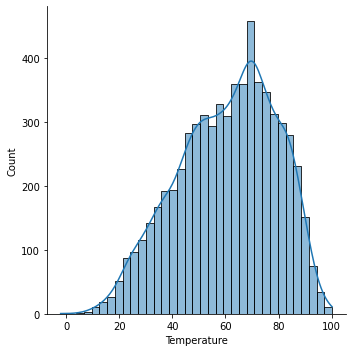

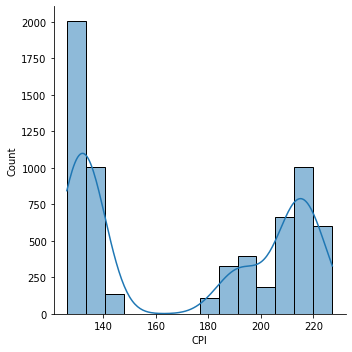

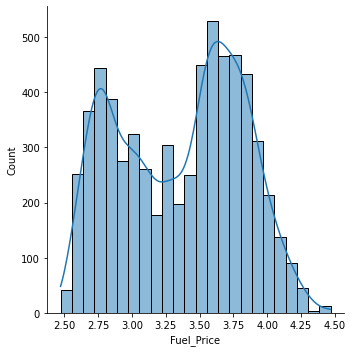

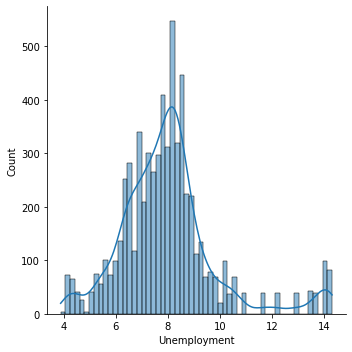

In [22]:
for i in range(len(nf)):
    sn.displot(wdata[nf[i]], kde=True)
    
plt.tight_layout()
plt.show()


<div style="font-family: Segoe UI; line-height: 2; color: #DE3163; text-align: justify;font-size: 25px">
    <b>Visualizing categorical features:</b>

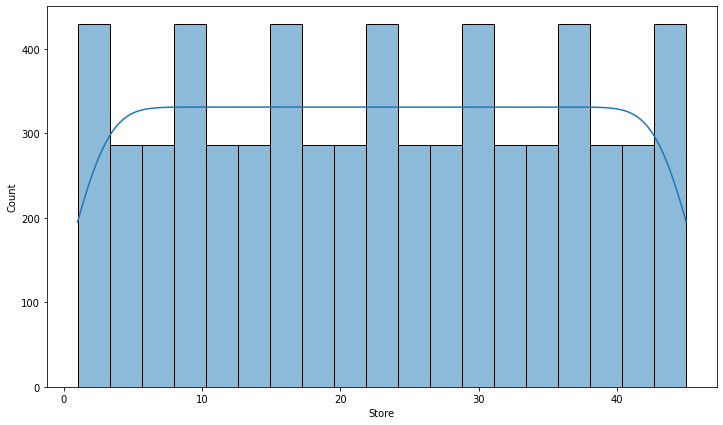

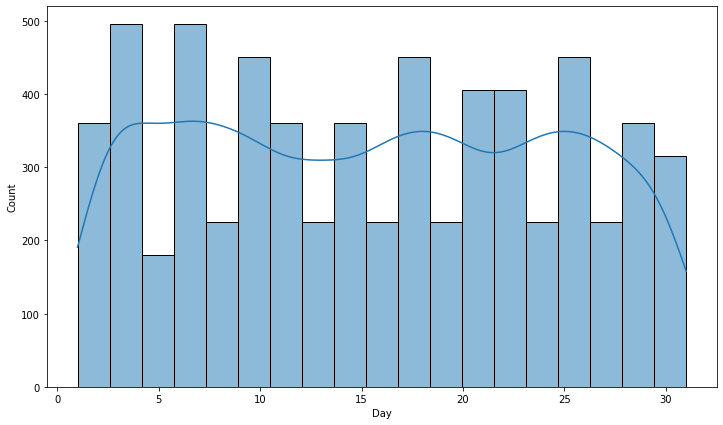

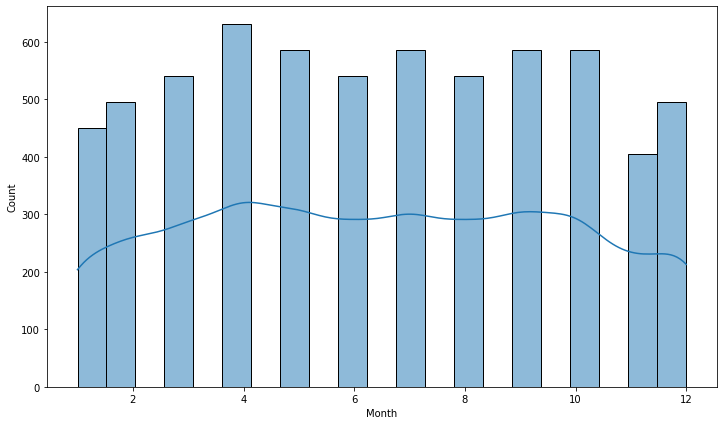

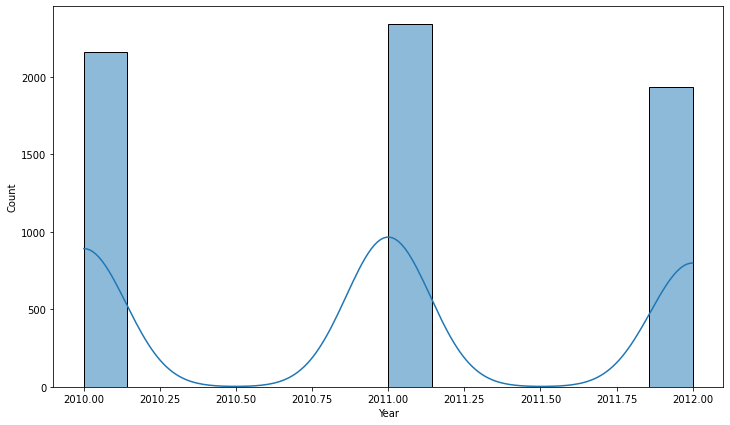

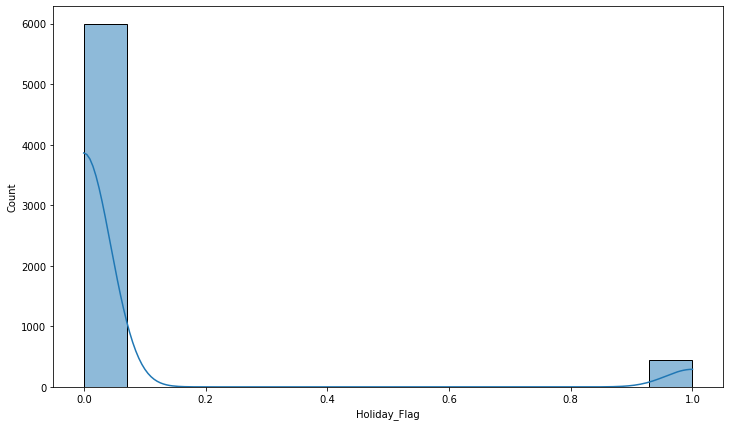

In [23]:
#Visualizing the categorical feature
for x in range(len(cf)):
    if cf[x] != 'MonthYear_value':
        plt.subplots(figsize=(12,7))
        sn.histplot(wdata[cf[x]], kde=True);

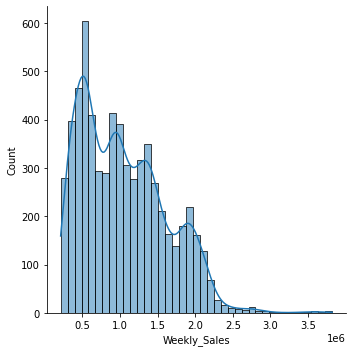

In [24]:
# Applied the density on target
sn.displot(wdata['Weekly_Sales'],kde=True);

<div style="font-family: Segoe UI; line-height: 2; color: #DE3163; text-align: justify;font-size: 25px">
<b>TOP 5 weekly sales stores</b>

In [25]:
#grouping and aggreting the data
df=wdata.groupby(wdata['Store']).aggregate({'Weekly_Sales': 'std'}).sort_values(by = 'Weekly_Sales',ascending = False)
df.reset_index(drop=True)
print("\n TOP 5 stores for weekly sales \n")
df.head(5)


 TOP 5 stores for weekly sales 



,Weekly_Sales
Store,
14,317569.952477
10,302262.077178
20,275900.566709
4,266201.450594
13,265506.987557


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

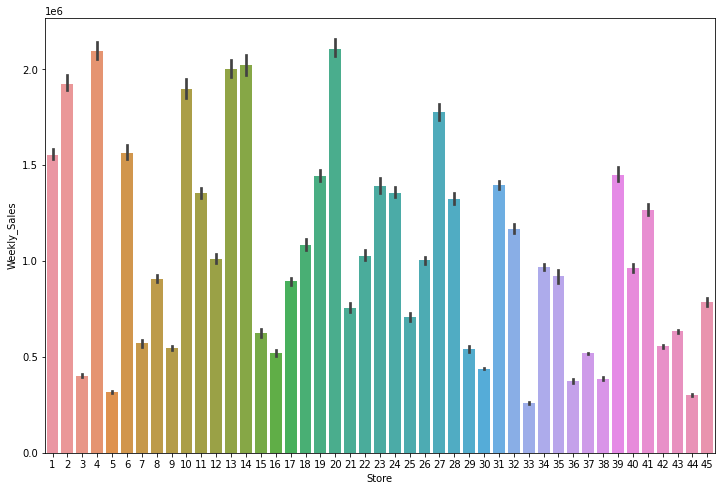

In [26]:
#Displaying the sales data
fig,ax=plt.subplots(figsize=(12,8))
sn.barplot(x='Store', y='Weekly_Sales',data=wdata)


<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Conclusion</b>

After seeing the data analysis,got to know 5th highest sales store
* Top 1: store 14
* Top 2: store 10
* Top 3: store 20
* Top 4: store 4 
* Tpo 5: store 13

<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
 <b>Which year is the Highest Weekly sales?</b>


In [27]:
#Doing the groupby of year and aggreate of sales
hs = wdata.groupby(wdata['Year']).aggregate({'Weekly_Sales': 'std'}).reset_index().sort_values(by = 'Weekly_Sales',ascending=False)

print("\n Highest weekly sales in year")
hs.head(1)


 Highest weekly sales in year


,Year,Weekly_Sales
0,2010,582386.103983


<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Summary</b>

As per the data, 2010 is the highest sales year in walmart store

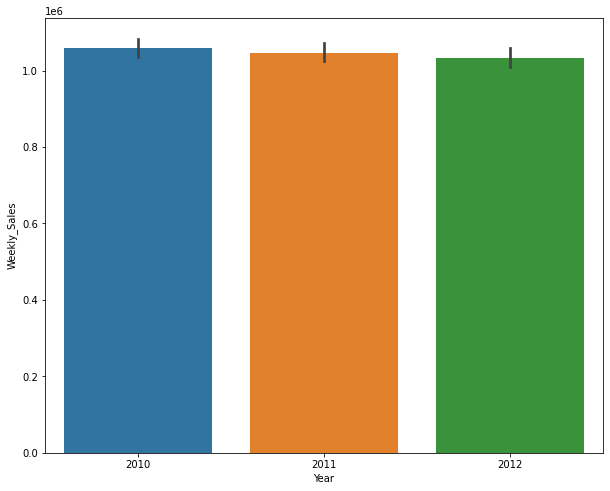

In [28]:
#Displaying the yearly sales price
fig,ax=plt.subplots(figsize=(10,8))
sn.barplot(data=wdata, x='Year', y='Weekly_Sales');

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Which Month is the Highest sales rate?</b>


In [29]:
#Finding the month with groupby 
hsale=wdata.groupby(wdata['Month']).aggregate({'Weekly_Sales': 'std'}).reset_index().sort_values(by = 'Weekly_Sales',ascending=False)
hsale.head()


,Month,Weekly_Sales
11,12,740396.852305
10,11,637010.952931
1,2,560597.378846
5,6,550777.055000
9,10,543662.628016


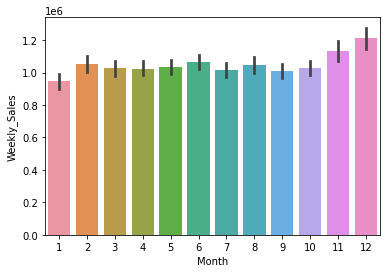

In [30]:
#Displaying the monthly sales rate
sn.barplot(data=wdata, x='Month', y='Weekly_Sales');

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Summary</b>

The december winter season is the highest sales rate in Walmart store 

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Which store is more unemployment rate?</b>

In [31]:
#Checking the unemployment rate
unemp=wdata['Unemployment'].groupby(wdata['Store']).sum().sort_values(ascending=False).reset_index()
unemp.head(10)

,Store,Unemployment
0,28,1875.656982
1,38,1875.656982
2,12,1875.656982
3,43,1420.677002
4,34,1420.677002
5,29,1402.312988
6,18,1263.876953
7,35,1256.765991
8,14,1236.770996
9,45,1236.770996


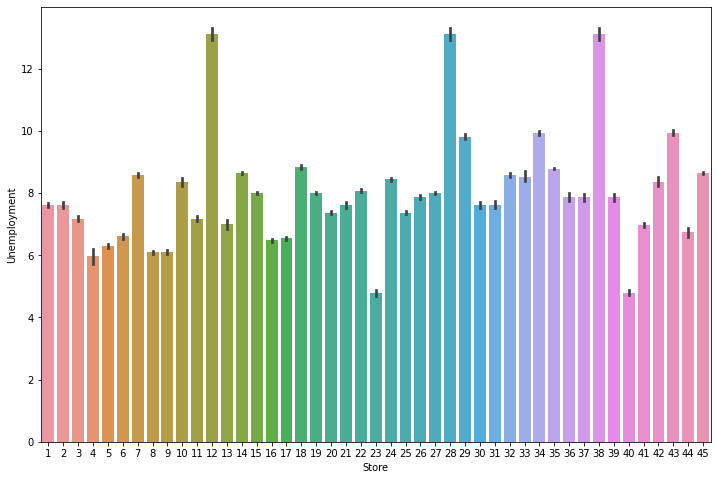

In [32]:
#Showing the unemployment rate
fig,ax=plt.subplots(figsize=(12,8))
sn.barplot(data=wdata, x= 'Store', y='Unemployment');

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Conclusion</b>

The walmart store number 28, 38 and 12 are the maximum unemployment rate.

<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
    👉 <b>Does Holiday effects weekly sales?</b>


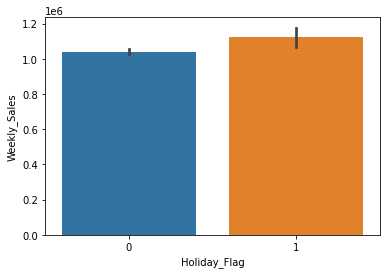

In [33]:
sn.barplot(data=wdata, x=wdata['Holiday_Flag'], y=wdata['Weekly_Sales']);

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    👉 <b>How does Temparature effects sales?</b>

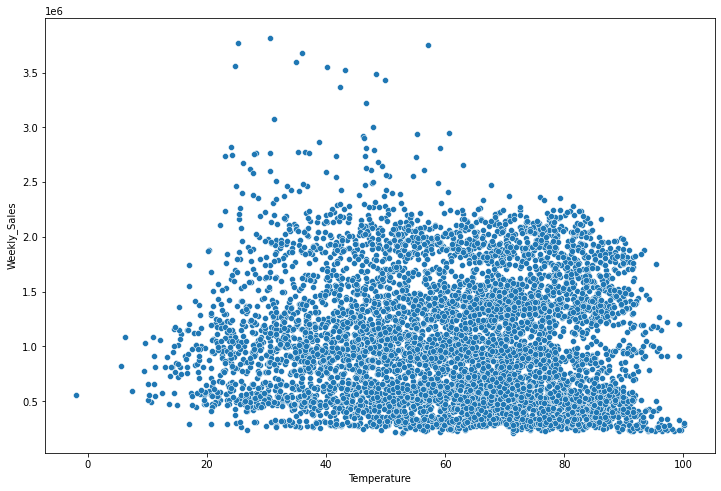

In [34]:
fig,ax=plt.subplots(figsize=(12,8))
sn.scatterplot(data=wdata, x=wdata['Temperature'], y=wdata['Weekly_Sales']);

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Conclusion</b>

* By checking the plot data, when temparature goes 40, the sales rate goes down.
* if temparature goes low, the sales rate goes up.

<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px">RandomForest Regression</div>

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Preparing & spliting model data</b>

In [35]:
#Defining the featurematrix(x) and response vector(y)
X=wdata.drop(columns=['Weekly_Sales', 'Year', 'Month', 'Day', 'MonthYear_value' ])
y=wdata.iloc[:, 1:2]

In [36]:
#we can split X and y into traininig and test sets. we will use 70% training and 30% test data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
     <b>Model creation and fitting training data</b>

In [37]:
#RandomForest object initialized 
rf_obj=RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_obj.fit(X_train,np.ravel(y_train))

RandomForestRegressor(random_state=0)

<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
     <b>Predicting the sales data</b>

In [38]:
#The RF module predicts the data
y_pred=rf_obj.predict(X_test)
y_pred

array([ 713068.90625 , 1378305.48625 ,  438706.31125 , ...,
       1563370.43375 , 1211195.043125,  606949.085625])

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Model evaluation & performance </b>

In [39]:
print(" \n The training score is: \n", round(rf_obj.score(X_train, y_train), 2))

 
 The training score is: 
 0.99


In [40]:
##Showing the evaluation of module and error score
print("\n RandomForestRegression model performance: \n")
print("Mean absolute error(MAE) =", round(mean_absolute_error(y_test, 
y_pred), 2))
print("Mean squared error(MSE) =", round(mean_squared_error(y_test, 
y_pred), 2)) 
print("Median absolute error =", round(median_absolute_error(y_test, 
y_pred), 2)) 
print("Explain variance score =", round(explained_variance_score(y_test, 
y_pred), 2))
print("R2 score =", round(r2_score(y_test, y_pred), 2))




 RandomForestRegression model performance: 

Mean absolute error(MAE) = 80285.21
Mean squared error(MSE) = 25400712695.33
Median absolute error = 38953.58
Explain variance score = 0.92
R2 score = 0.92


<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>Conclusion</b>

* The Mean squared error is high.
* The Explained variance score is close to 92%
* The R2 score is close to 92%, so Model is not overfitting 

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>MSE and estimators checking in plot</b>

In [41]:
#took the 100 trees and combining the MSE
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X_train, np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rf.predict(X_test)))



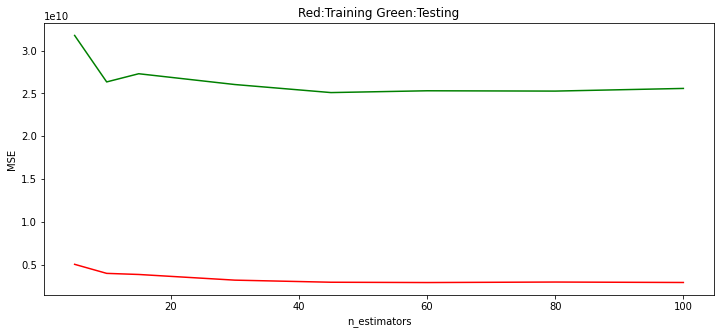

In [42]:
#Displaying the MSE error ploting
plt.subplots(figsize=(12,5))
plt.plot(list_nb_trees, train_results, color="r", linestyle='-', label="Training Score")
plt.plot(list_nb_trees, test_results, color="g", linestyle='-', label="Testing Score")
plt.title("Red:Training Green:Testing")
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

* The plot data shows from MSE(1.2,5) falling MSE(0.2,15) to estimatores 30
* After n_estimatores 40, MSE is constant. 

* The Testing MSE error shows from MSE(1.2,5) falling MSE(0.2,15) to estimatores 30
* After n_estimatores 40, MSE is constant. 

<div style="font-family: Segoe UI; line-height: 2; color: #FF0000; text-align: justify;font-size: 25px">
    👉 <b>Evaluating Feature Importance</b>

In [43]:
#Took the feature_importance of RFR
reg_feature_imp = pd.Series(rf_obj.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
reg_feature_imp*100
reg_feature_imp.reset_index()

,index,0
0,Store,0.670952
1,CPI,0.179590
2,Unemployment,0.095413
3,Temperature,0.028178
4,Fuel_Price,0.021980
5,Holiday_Flag,0.003887


As per the data
1. Store has 67% which is highest feature importances
2. Holiday_flag is the lowest feature importance


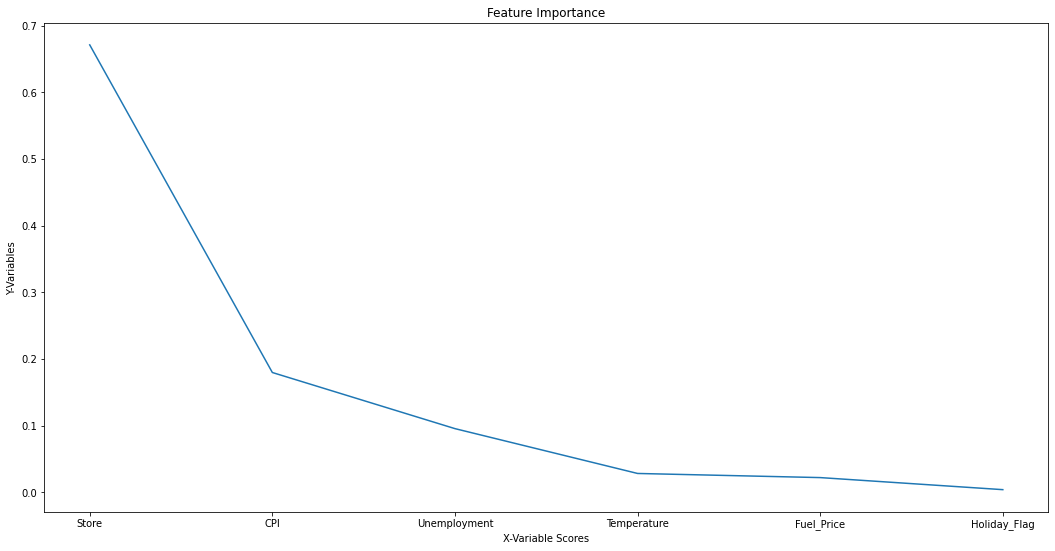

In [44]:
#Displaying the feature importances in plot
plt.subplots(figsize=(18,9))
plt.plot(reg_feature_imp)
plt.xlabel("X-Variable Scores")
plt.ylabel("Y-Variables")
plt.title("Feature Importance")
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000080; text-align: justify;font-size: 25px">
    <b>Pipeline & Model building</b>


In [45]:
#Creating the pipe line for model
pipe1=make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=100, max_depth = 35))

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Training the data to model</b>

In [46]:
#Training the data to ML module
pipe1.fit(X_train, np.ravel(y_train));

In [47]:
#Predicting the result of sales
prob_pipe1=pipe1.predict(X_test)
prob_pipe1

array([ 713993.846875 , 1365966.08     ,  438742.9046875, ...,
       1572345.5775   , 1223562.86125  ,  612315.126875 ])

In [48]:
#Displaying the score of train data
pipe1.score(X_test,prob_pipe1)

1.0

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    <b>Model evaluation & Performance</b>

In [49]:
#Showing the evaluation of module and error score
print("\n RandomForestRegression pipe & model performance: \n")
print("Mean absolute error(MAE) =", round(mean_absolute_error(y_test, 
prob_pipe1), 2))
print("\n")
print("Mean squared error(MSE) =", round(mean_squared_error(y_test, 
prob_pipe1), 2)) 
print("\n")
print("Median absolute error =", round(median_absolute_error(y_test, 
prob_pipe1), 2)) 
print("\n")
print("Explain variance score =", round(explained_variance_score(y_test, 
prob_pipe1), 2))
print("\n")
print("R2 score =", round(r2_score(y_test, prob_pipe1), 2))
print("\n")


 RandomForestRegression pipe & model performance: 

Mean absolute error(MAE) = 80353.31


Mean squared error(MSE) = 25861591873.44


Median absolute error = 36924.86


Explain variance score = 0.92


R2 score = 0.92




* The Mean squared error is high.
* The Explained variance score is close to 92%
* The R2 score is close to 92%, so Model is not overfitting 

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    <b>The Mead Squared Error in ploting</b>

In [50]:
#The 100 trees predicting values are combining of train data
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rfpipe=make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=nb_trees, max_depth = 5))
    rfpipe.fit(X_train, np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, rfpipe.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rfpipe.predict(X_test)))


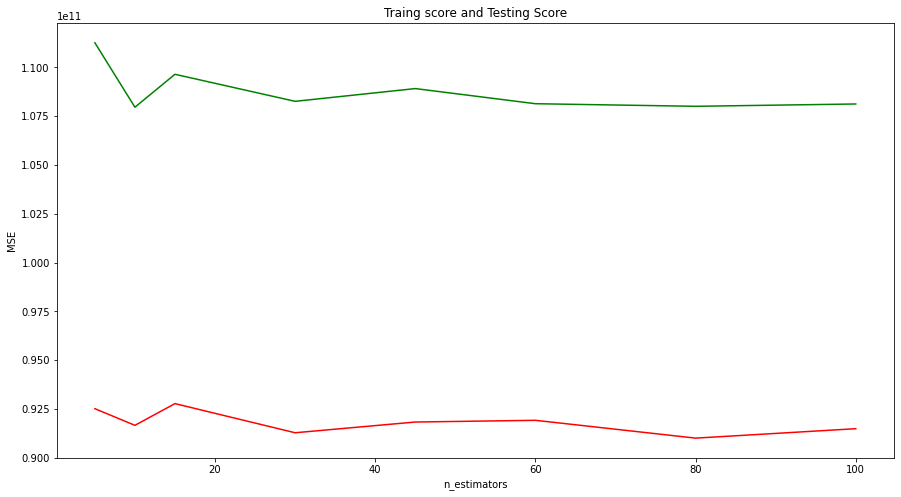

In [51]:
#Displaying The MSE and N-Estimatores tree of traing data
plt.subplots(figsize=(15,8))
plt.plot(list_nb_trees, train_results, color="r", linestyle='-', label="Training Score")
plt.plot(list_nb_trees, test_results, color="g", linestyle='-', label="Testing Score")
plt.title("Traing score and Testing Score")
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px">RandomForest Regression and PowerTransformer </div>
   


In [52]:
#creating the pipe line of powerTransformer and RFregressor
pipe2=make_pipeline(StandardScaler(), PowerTransformer(standardize = True),RandomForestRegressor(n_estimators=100, max_depth = 10))

In [53]:
#Training the model
pipe2.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('powertransformer', PowerTransformer()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [54]:
#Predicting the training data
pipe_ypred=pipe2.predict(X_test)
pipe_ypred

array([ 760020.64855476, 1324283.41445843,  435019.74838114, ...,
       1595586.8915264 , 1230266.90314482,  619906.14801145])

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    <b>Model evaluation & performance</b>

In [55]:
print("\n RandomForestRegression PowerTransformer & model performance: \n")
print("Mean absolute error(MAE) =", round(mean_absolute_error(y_test, 
pipe_ypred), 2))
print("\n")
print("Mean squared error(MSE) =", round(mean_squared_error(y_test, 
pipe_ypred), 2)) 
print("\n")
print("Median absolute error =", round(median_absolute_error(y_test, 
pipe_ypred), 2)) 
print("\n")
print("Explain variance score =", round(explained_variance_score(y_test, 
pipe_ypred), 2))
print("\n")
print("R2 score =", round(r2_score(y_test, pipe_ypred), 2))
print("\n")


 RandomForestRegression PowerTransformer & model performance: 

Mean absolute error(MAE) = 84226.62


Mean squared error(MSE) = 27912015495.46


Median absolute error = 43356.42


Explain variance score = 0.91


R2 score = 0.91




<div style="font-family: Segoe UI; line-height: 2; color: #808800; text-align: justify;font-size: 25px">
    <b>The MSE error ploting</b>

In [56]:
#Combining the MSE of 100 trees of training data
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]
for nb_trees in list_nb_trees:
    rfpipe2=make_pipeline(StandardScaler(), PowerTransformer(standardize = True),RandomForestRegressor(n_estimators=nb_trees, max_depth = 10))
    rfpipe2.fit(X_train,np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, rfpipe2.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rfpipe2.predict(X_test)))



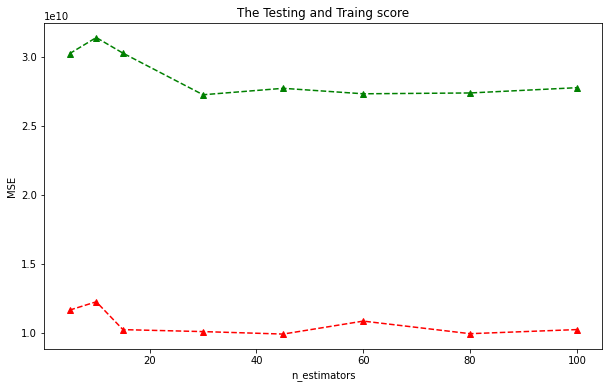

In [57]:
#The MSE and Training score data
plt.subplots(figsize=(10,6))
plt.plot(list_nb_trees, train_results, 'r--^', label = "Training score")
plt.plot(list_nb_trees, test_results, 'g--^', label="Testing Score")
plt.title("The Testing and Traing score")
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: ##800080; text-align: justify;font-size: 25px">
    <b>Evaluating Feature Importance</b>

In [58]:
#Thw feature importances of x_train data
feature_imp = pd.Series(pipe1.steps[1][1].feature_importances_,
                        index = X_train.columns)
feature_imp

Store           0.664557
Holiday_Flag    0.004026
Temperature     0.027688
Fuel_Price      0.022784
CPI             0.175010
Unemployment    0.105936
dtype: float64

<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#800080; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px">Gradient Boosting regression</div>

In [59]:
#Defining the gradient boosting parameters
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
   <b>Fitting the training data</b>


In [60]:
#Creating the GBR object
grig=GradientBoostingRegressor(**params)
#Training the model
grig.fit(X_train,np.ravel(y_train))

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5)

In [61]:
#Predicting the result
gr_pred=grig.predict(X_test)
print("\n Prediction result: \n\n",gr_pred)


 Prediction result: 

 [1044194.19630023 1179633.54132323  739757.02855202 ... 1362836.96351292
 1044630.656431    888098.39612796]


<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
    <b>Model evaluation & Performance</b>

In [62]:
#Model evaluation and performance
print("\n RandomForestRegression Gradient Boosting& model performance: \n")
print("Mean absolute error(MAE) =", round(mean_absolute_error(y_test, 
gr_pred), 2))
print("\n")
print("Mean squared error(MSE) =", round(mean_squared_error(y_test, 
gr_pred), 2)) 
print("\n")
print("Median absolute error =", round(median_absolute_error(y_test, 
gr_pred), 2)) 
print("\n")
print("Explain variance score =", round(explained_variance_score(y_test, 
gr_pred), 2))
print("\n")
print("R2 score =", round(r2_score(y_test, gr_pred), 2))
print("\n")


 RandomForestRegression Gradient Boosting& model performance: 

Mean absolute error(MAE) = 297622.95


Mean squared error(MSE) = 143436527243.39


Median absolute error = 274678.69


Explain variance score = 0.56


R2 score = 0.56




* The Mean squared error is high.
* The Explained variance score is close to 57%
* The R2 score is close to 57%, so Model is not good 

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
    👉 <b>Gradient Boosting MSE error plotting</b>

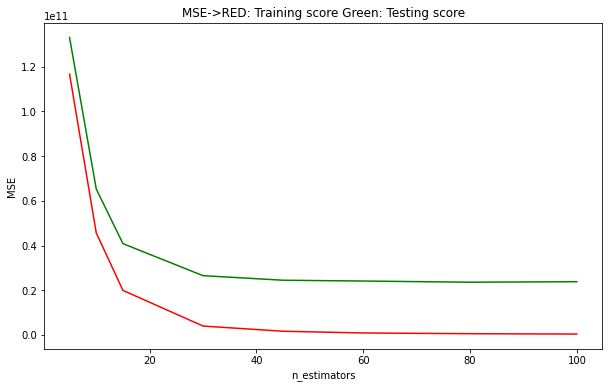

In [63]:
#Taking the MSE combining result of 100 trees for train and test data
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    grig=GradientBoostingRegressor(n_estimators=nb_trees,max_depth=10)
    grig.fit(X_train,np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, grig.predict(X_train)))
    test_results.append(mean_squared_error(y_test, grig.predict(X_test)))
plt.subplots(figsize=(10,6))
plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")
plt.title('MSE->RED: Training score Green: Testing score')
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: ##800080; text-align: justify;font-size: 20px">
    <b>Evaluating GradientBoosting Feature Importance</b>

In [64]:
#Thw feature importances of x_train data
feature_imp = pd.Series(grig.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
feature_imp*100

Store           64.875269
CPI             17.046211
Unemployment    12.848537
Temperature      2.526798
Fuel_Price       2.425817
Holiday_Flag     0.277368
dtype: float64

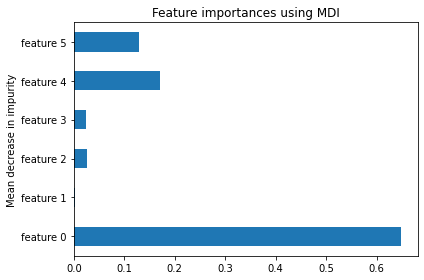

In [65]:
importances = grig.feature_importances_
std = np.std([grig.feature_importances_ for tree in grig.estimators_], axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

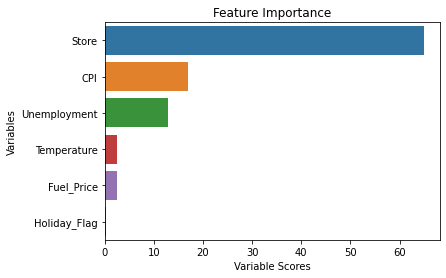

In [66]:
#Displaying the feature_importances data
sn.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
   <b>XGBClassifier and GridSearchCV</b>

In [67]:
#Defining parameter 
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200],
        'objective': ['reg:squarederror']
    }

In [68]:
gsearch = GridSearchCV(estimator = XGBRegressor(),
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1)

In [69]:
#Training the model

gsearch.fit(X_train,y_train)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             

In [70]:
gsearch.best_score_

-85556.41796875

In [71]:
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [72]:
xgb_pred=gsearch.predict(X_test)
xgb_pred

array([ 692887.06, 1372483.9 ,  467602.4 , ..., 1593895.5 , 1170626.1 ,
        591429.8 ], dtype=float32)

In [73]:
mean_squared_error(y_test,xgb_pred)

19394263000.0

### <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Xgboost hyperparameter tuning link given below</div>

[Xgboost hyperparameter tuning Click here](https://www.kaggle.com/code/avijit298/xgboost-hyperparameter-tuning)


<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#FFF0F5 ;
           font-size:110%;
            text-align: left">
<p style="font-family:newtimeroman;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> ✨Best Wishes✨</p>

![https://jessieslegacy.com/wp-content/uploads/2014/01/thankyou_ikit.png](https://jessieslegacy.com/wp-content/uploads/2014/01/thankyou_ikit.png)